In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
data = tf.keras.utils.image_dataset_from_directory(r'D:/FSDS/Datasets/face_classification/train', batch_size=1)

Found 165 files belonging to 2 classes.


In [3]:
def sample(where=data, n=10):
  plt.figure(figsize=(15, 10))
  count = 0
  for images, labels in where:
    num_images = min(n, images.shape[0])

    for i in range(num_images):
      if count >= n:
        break
      ax = plt.subplot(5, 5, count + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      class_name = 'Sad' if labels[i].numpy() == 1 else 'Happy'
      plt.title(class_name)
      plt.axis("off")
      count += 1
      if count >= n:
        break
  plt.show()

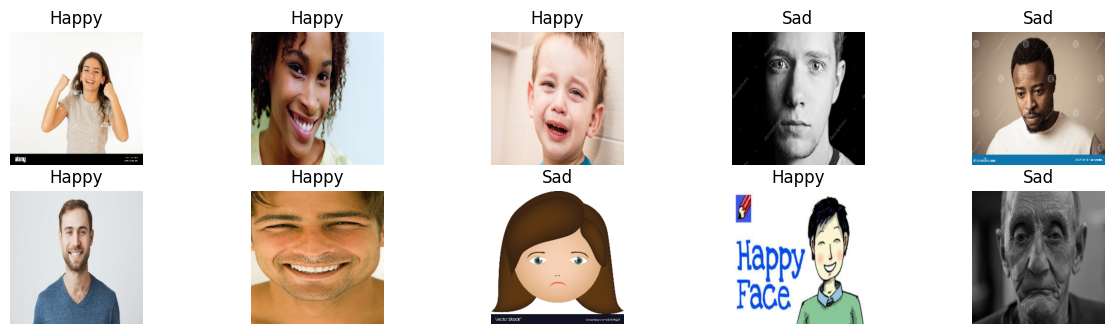

In [4]:
sample()

In [5]:
data_noramlized = data.map(lambda x,y: (x/255, y))

In [6]:
def split_data(dataset):
  train, temp = dataset.take(int(0.7 * len(dataset))), dataset.skip(int(0.7 * len(dataset)))
  val, test = temp.take(int(0.5 * len(temp))), temp.skip(int(0.5 * len(temp)))
  return train, val, test

In [7]:
data_train, data_val, data_test = split_data(data_noramlized.concatenate(data_noramlized))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf

def build_model(info=False):
    model = Sequential([
        Input(shape=(256, 256, 3)),   # Image input
        Conv2D(16, (3, 3), strides=1, activation='relu'),
        MaxPooling2D(),
        Conv2D(32, (3, 3), strides=1, activation='relu'),
        MaxPooling2D(),
        Conv2D(16, (3, 3), strides=1, activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    if info:
        model.summary()

    return model

classification_model = build_model(info=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = classification_model.fit(data_train, epochs=12, validation_data=data_val)

Epoch 1/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.5144 - loss: 0.7606 - val_accuracy: 0.6800 - val_loss: 0.6336
Epoch 2/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7214 - loss: 0.6161 - val_accuracy: 0.7400 - val_loss: 0.4369
Epoch 3/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.8358 - loss: 0.3901 - val_accuracy: 0.7000 - val_loss: 0.6158
Epoch 4/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.8272 - loss: 0.6331 - val_accuracy: 0.7800 - val_loss: 0.6875
Epoch 5/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9162 - loss: 0.2386 - val_accuracy: 0.8600 - val_loss: 0.4014
Epoch 6/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.9372 - loss: 0.2178 - val_accuracy: 0.9400 - val_loss: 0.1530
Epoch 7/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9091 - loss: 0.3028 - val_accuracy: 0.9200 - val_loss: 0.1490
Epoch 8/12
230/230 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9634 - loss: 0.1041 - 

In [10]:
def stadistics(hist):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(hist.history['loss'], color='teal', label='loss')
  plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
  plt.legend(loc="upper left")
  plt.title('Loss', fontsize=20)

  plt.subplot(1, 2, 2)
  plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
  plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
  plt.title('Accuracy', fontsize=20)
  plt.legend(loc="upper left")

  plt.show()

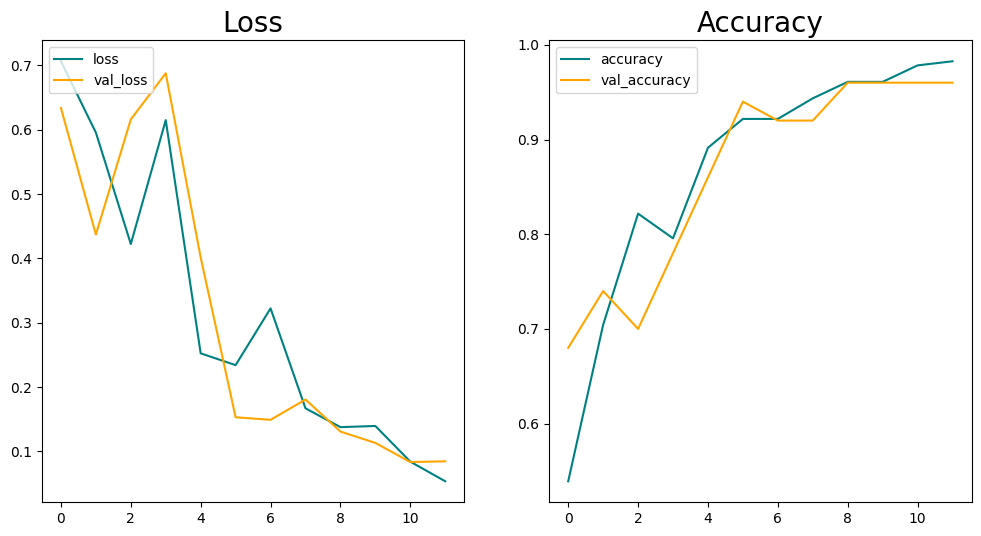

In [11]:
stadistics(history)

In [12]:
def evaluation(dtest):
  from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
  import pandas as pd

  x_test = []
  y_test = []

  for images, labels in dtest:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())

  x_test = np.array(x_test)
  y_test = np.array(y_test)

  pred = classification_model.predict(x_test, verbose=False)
  y_pred = (pred > 0.5).astype(int)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)

  stadistics = {
    'Metrics': ['Accuracy', 'F1-score', 'Sensitivity','Specificity'],
    'Scores': [accuracy, f1, recall, specificity]
    }

  plt.figure(figsize=(15, 10))
  for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])

    class_name = 'Happy' if y_pred[i][0] == 0 else 'Sad'
    plt.title(class_name)
    plt.axis('off')
  plt.show()

  return pd.DataFrame(stadistics)

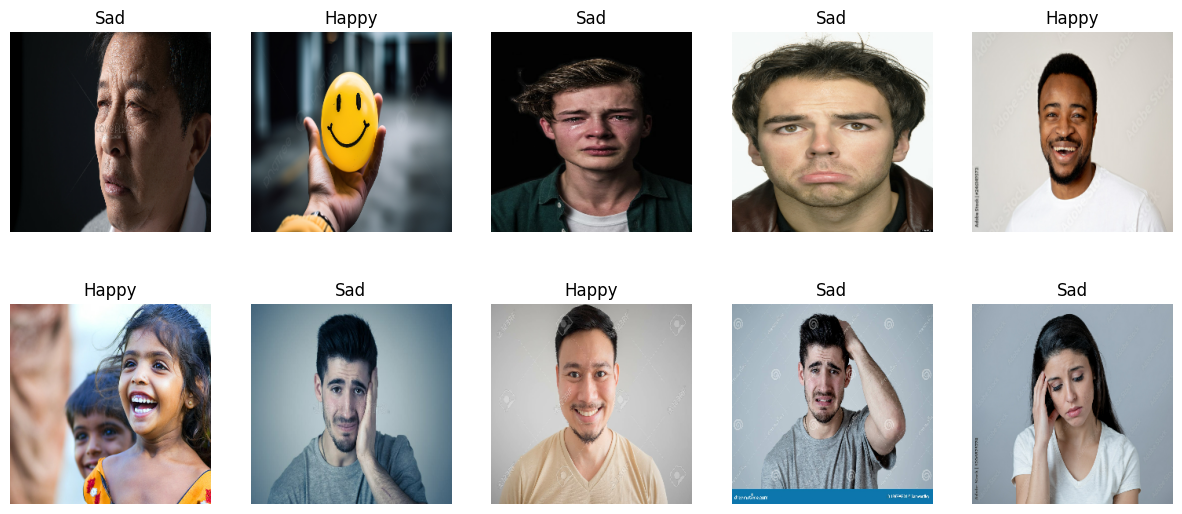

In [13]:
stats = evaluation(data_test)

In [14]:
stats

,Metrics,Scores
0,Accuracy,0.980000
1,F1-score,0.979592
2,Sensitivity,1.000000
3,Specificity,0.961538
